<a href="https://colab.research.google.com/github/Rishabh-Tripathi1/GRIPIP/blob/main/Color%20Identification%20/%20Task_1_Color_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Computer Vision & Internet of Things***

## ***Task 1: Color Identification in Images*** 

### ***Rishabh Tripathi***
April 2023 Batch

Implement an image color detector which identifies all the colors in an
image or video.



In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [14]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [26]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        # plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.bar(range(len(counts)), counts.values(), color=hex_colors)
        plt.xticks(range(len(counts)), hex_colors, rotation='vertical')
        plt.show()
    
    return rgb_colors

Shape: (667, 1000, 3)


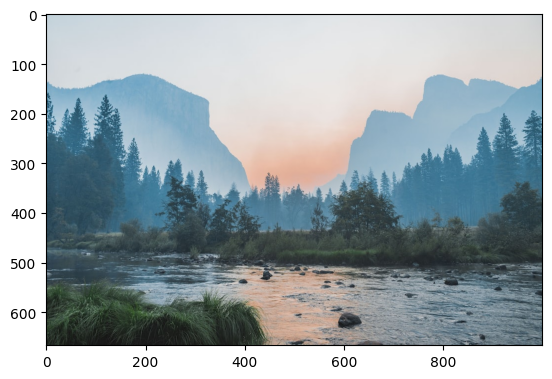

In [8]:
image_sub = cv2.imread('photo.jpg')
print("Shape: {}".format(image_sub.shape))

image =  cv2.cvtColor(image_sub, cv2.COLOR_BGR2RGB)
plt.imshow(image)

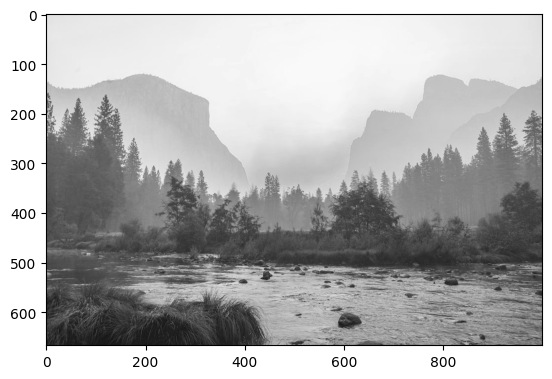

In [10]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

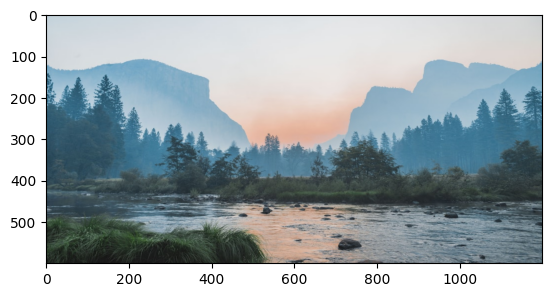

In [13]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


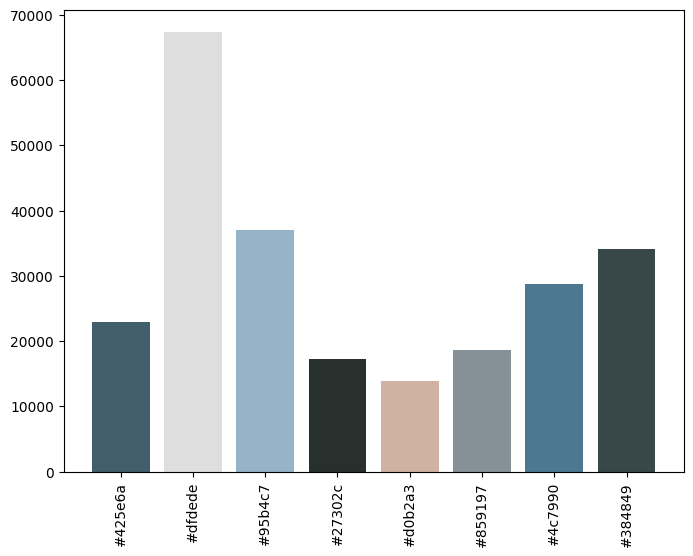

[array([ 66.27283543,  94.76356026, 106.90438423]),
 array([223.26306424, 222.44907764, 222.56770864]),
 array([149.41978473, 180.77477137, 199.33051876]),
 array([39.32984835, 48.22788373, 44.60299862]),
 array([208.35432675, 178.45421903, 163.4145781 ]),
 array([133.00895651, 145.37083198, 151.44518183]),
 array([ 76.35947416, 121.46199177, 144.6963526 ]),
 array([56.49548971, 72.62320829, 73.81331193])]

In [27]:
get_colors(image, 8, True)